**Decision Tree**

Importing libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading dataset

In [149]:
df = pd.read_csv("/content/drug-decision-tree.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Data Visualization

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Na_to_K'}>]], dtype=object)

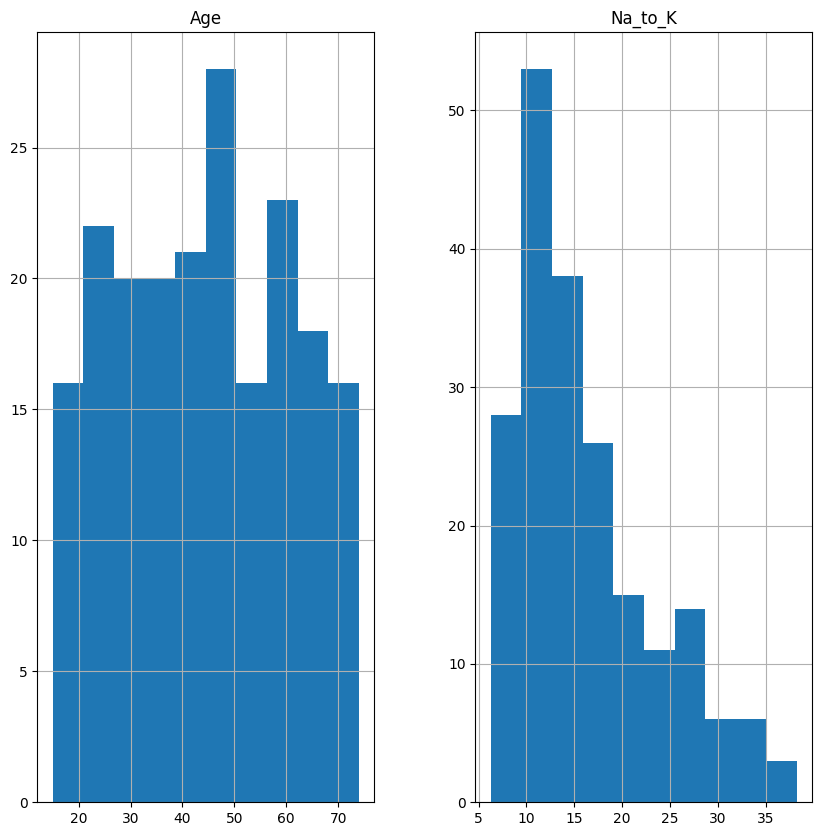

In [150]:
df.hist(figsize=(10, 10))

Step 1: Data Preprocessing


In [151]:
df['Drug'].value_counts()

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


Feature and Target Selection

In [152]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug'].values

Normalization

In [153]:
from sklearn import preprocessing
new_sex = preprocessing.LabelEncoder()
new_sex.fit(['F', 'M'])
X[:,1] = new_sex.transform(X[:,1])
#print(X[:5])

new_bp = preprocessing.LabelEncoder()
new_bp.fit(['HIGH', 'LOW', 'NORMAL'])
X[:,2] = new_bp.transform(X[:,2])
#print(X[:5])

new_Cholesterol = preprocessing.LabelEncoder()
new_Cholesterol.fit(['NORMAL', 'HIGH'])
X[:,3] = new_Cholesterol.transform(X[:,3])
print(X[:5])


[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.114]
 [28 0 2 0 7.798]
 [61 0 1 0 18.043]]


In [154]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

Step 2: Train/test split

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3: Algorithm Setup

Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

Step 4: Model Fitting

In [157]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Step 5: Predictions

In [158]:
y_pred = model.predict(X_test)

Step 6: Evaluation

In [159]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Knn Accuracy: {accuracy}")
print(f"\nClassification Report:\n {classification_report(y_test, y_pred)}")
print(f"\nConfusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Decision Accuracy: 100.0

Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
